In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [2]:
df1 = pd.read_csv('datasets\Q_06_latest-2023-2024_RR-T-Vent.csv', sep= ';')
df2 = pd.read_csv('datasets\Q_06_previous-1950-2022_RR-T-Vent.csv', sep = ';')

In [3]:
df1.head()

,NUM_POSTE,NOM_USUEL,LAT,LON,ALTI,AAAAMMJJ,RR,QRR,TN,QTN,...,DXI2,QDXI2,HXI2,QHXI2,FXI3S,QFXI3S,DXI3S,QDXI3S,HXI3S,QHXI3S
0,6004002,ANTIBES-GAROUPE,43.564667,7.133,75,20230101,0.0,1.0,11.9,1.0,...,NaN,NaN,NaN,NaN,5.7,1.0,NaN,NaN,2042.0,9.0
1,6004002,ANTIBES-GAROUPE,43.564667,7.133,75,20230102,0.0,1.0,10.3,1.0,...,NaN,NaN,NaN,NaN,10.4,1.0,NaN,NaN,1927.0,9.0
2,6004002,ANTIBES-GAROUPE,43.564667,7.133,75,20230103,0.0,1.0,10.7,1.0,...,NaN,NaN,NaN,NaN,4.1,1.0,NaN,NaN,139.0,9.0
3,6004002,ANTIBES-GAROUPE,43.564667,7.133,75,20230104,0.0,1.0,10.2,1.0,...,NaN,NaN,NaN,NaN,7.3,1.0,NaN,NaN,1632.0,9.0
4,6004002,ANTIBES-GAROUPE,43.564667,7.133,75,20230105,0.0,1.0,9.1,1.0,...,NaN,NaN,NaN,NaN,7.7,1.0,NaN,NaN,1922.0,9.0


In [4]:
df1.columns

Index(['NUM_POSTE', 'NOM_USUEL', 'LAT', 'LON', 'ALTI', 'AAAAMMJJ', 'RR', 'QRR',
       'TN', 'QTN', 'HTN', 'QHTN', 'TX', 'QTX', 'HTX', 'QHTX', 'TM', 'QTM',
       'TNTXM', 'QTNTXM', 'TAMPLI', 'QTAMPLI', 'TNSOL', 'QTNSOL', 'TN50',
       'QTN50', 'DG', 'QDG', 'FFM', 'QFFM', 'FF2M', 'QFF2M', 'FXY', 'QFXY',
       'DXY', 'QDXY', 'HXY', 'QHXY', 'FXI', 'QFXI', 'DXI', 'QDXI', 'HXI',
       'QHXI', 'FXI2', 'QFXI2', 'DXI2', 'QDXI2', 'HXI2', 'QHXI2', 'FXI3S',
       'QFXI3S', 'DXI3S', 'QDXI3S', 'HXI3S', 'QHXI3S'],
      dtype='object')

In [5]:
df1 = df1.drop(['QTN','QRR', 'HTN', 'QHTN', 'QTX', 'HTX', 'QHTX', 'TM', 'QTM',
       'TNTXM', 'QTNTXM', 'TAMPLI', 'QTAMPLI', 'TNSOL', 'QTNSOL', 'TN50',
       'QTN50', 'DG', 'QDG', 'FFM', 'QFFM', 'FF2M', 'QFF2M', 'FXY', 'QFXY',
       'DXY', 'QDXY', 'HXY', 'QHXY', 'FXI', 'QFXI', 'DXI', 'QDXI', 'HXI',
       'QHXI', 'FXI2', 'QFXI2', 'DXI2', 'QDXI2', 'HXI2', 'QHXI2', 'FXI3S',
       'QFXI3S', 'DXI3S', 'QDXI3S', 'HXI3S', 'QHXI3S'], axis=1)
df2 = df2.drop(['QTN','QRR', 'HTN', 'QHTN', 'QTX', 'HTX', 'QHTX', 'TM', 'QTM',
       'TNTXM', 'QTNTXM', 'TAMPLI', 'QTAMPLI', 'TNSOL', 'QTNSOL', 'TN50',
       'QTN50', 'DG', 'QDG', 'FFM', 'QFFM', 'FF2M', 'QFF2M', 'FXY', 'QFXY',
       'DXY', 'QDXY', 'HXY', 'QHXY', 'FXI', 'QFXI', 'DXI', 'QDXI', 'HXI',
       'QHXI', 'FXI2', 'QFXI2', 'DXI2', 'QDXI2', 'HXI2', 'QHXI2', 'FXI3S',
       'QFXI3S', 'DXI3S', 'QDXI3S', 'HXI3S', 'QHXI3S'], axis=1)

In [6]:
df1.head()

,NUM_POSTE,NOM_USUEL,LAT,LON,ALTI,AAAAMMJJ,RR,TN,TX
0,6004002,ANTIBES-GAROUPE,43.564667,7.133,75,20230101,0.0,11.9,15.7
1,6004002,ANTIBES-GAROUPE,43.564667,7.133,75,20230102,0.0,10.3,16.7
2,6004002,ANTIBES-GAROUPE,43.564667,7.133,75,20230103,0.0,10.7,18.2
3,6004002,ANTIBES-GAROUPE,43.564667,7.133,75,20230104,0.0,10.2,18.2
4,6004002,ANTIBES-GAROUPE,43.564667,7.133,75,20230105,0.0,9.1,16.9


In [7]:
df2.head()

,NUM_POSTE,NOM_USUEL,LAT,LON,ALTI,AAAAMMJJ,RR,TN,TX
0,6003002,ANDON DOMAINE DE THORENC,43.773333,6.785,1250,19520101,0.0,NaN,NaN
1,6003002,ANDON DOMAINE DE THORENC,43.773333,6.785,1250,19520102,0.0,NaN,NaN
2,6003002,ANDON DOMAINE DE THORENC,43.773333,6.785,1250,19520103,0.0,NaN,NaN
3,6003002,ANDON DOMAINE DE THORENC,43.773333,6.785,1250,19520104,0.0,NaN,NaN
4,6003002,ANDON DOMAINE DE THORENC,43.773333,6.785,1250,19520105,0.0,NaN,NaN


In [8]:
df = pd.concat([df2, df1])

In [9]:
df.head()

,NUM_POSTE,NOM_USUEL,LAT,LON,ALTI,AAAAMMJJ,RR,TN,TX
0,6003002,ANDON DOMAINE DE THORENC,43.773333,6.785,1250,19520101,0.0,NaN,NaN
1,6003002,ANDON DOMAINE DE THORENC,43.773333,6.785,1250,19520102,0.0,NaN,NaN
2,6003002,ANDON DOMAINE DE THORENC,43.773333,6.785,1250,19520103,0.0,NaN,NaN
3,6003002,ANDON DOMAINE DE THORENC,43.773333,6.785,1250,19520104,0.0,NaN,NaN
4,6003002,ANDON DOMAINE DE THORENC,43.773333,6.785,1250,19520105,0.0,NaN,NaN


In [10]:
df_test = df[df['NOM_USUEL'] == 'TENDE_SAPC']

In [11]:
df_test.head()

,NUM_POSTE,NOM_USUEL,LAT,LON,ALTI,AAAAMMJJ,RR,TN,TX
1627019,6163007,TENDE_SAPC,44.043167,7.586,636,19890721,0.0,12.7,27.0
1627020,6163007,TENDE_SAPC,44.043167,7.586,636,19890722,0.0,18.2,27.0
1627021,6163007,TENDE_SAPC,44.043167,7.586,636,19890723,0.0,18.7,27.8
1627022,6163007,TENDE_SAPC,44.043167,7.586,636,19890724,1.2,17.9,27.2
1627023,6163007,TENDE_SAPC,44.043167,7.586,636,19890725,3.2,16.1,29.3


In [12]:
df_test.dropna(subset = ['TN', 'TX', 'RR'], inplace = True)
df_test.shape

C:\Users\Martin\AppData\Local\Temp\ipykernel_20188\2537731509.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test.dropna(subset = ['TN', 'TX', 'RR'], inplace = True)


(12313, 9)

## Séries temporelles

In [13]:
from pmdarima import auto_arima

model = auto_arima(df_test['TX'], seasonal=True, trace=True, stepwise= True)

print(model.summary())

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=57602.956, Time=4.88 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=84073.732, Time=0.09 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=58799.438, Time=0.24 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=73436.863, Time=0.76 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=107871.623, Time=0.05 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=57845.339, Time=1.59 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=57608.648, Time=2.39 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=57612.541, Time=2.78 sec
 ARIMA(2,0,3)(0,0,0)[0] intercept   : AIC=57604.465, Time=4.41 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=58112.373, Time=1.04 sec
 ARIMA(1,0,3)(0,0,0)[0] intercept   : AIC=57701.896, Time=1.82 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=57602.777, Time=4.10 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=58102.075, Time=0.64 sec
 ARIMA(4,0,1)(0,0,0)[0] intercept   : AIC=57604.554, Time=5.27 sec
 ARIMA(2,0,0)(0,0,

Meilleur modèle : ARIMA(3,0,1)

C:\Users\Martin\AppData\Local\Temp\ipykernel_20188\3539273203.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['date'] = pd.to_datetime(df_test['AAAAMMJJ'], format='%Y%m%d')


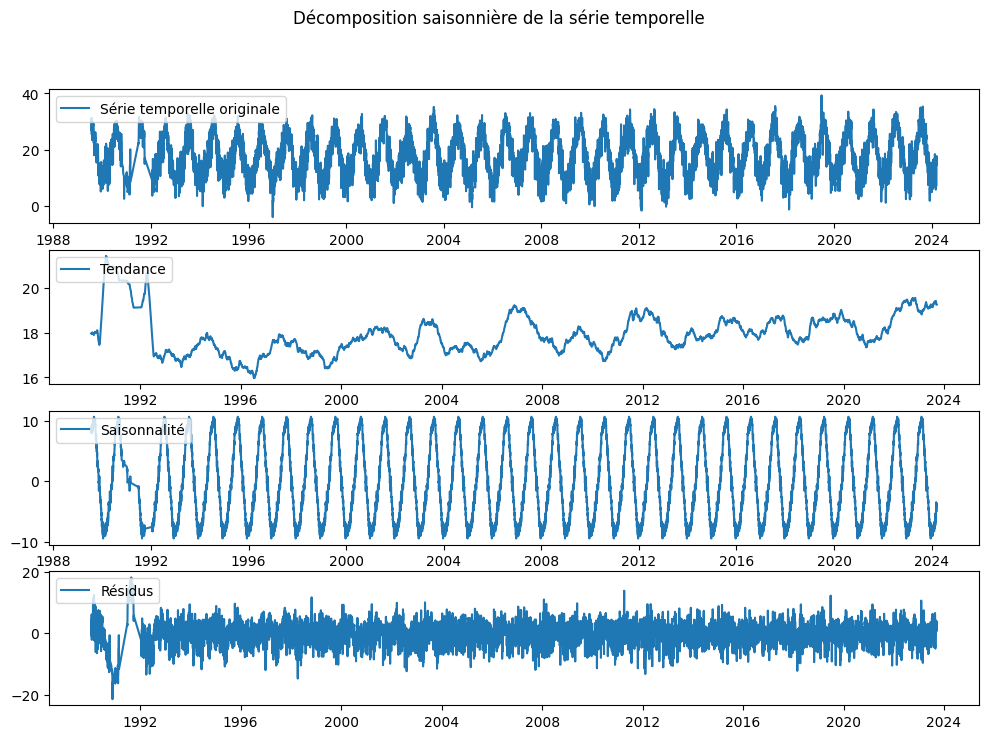

In [14]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Supposons que votre DataFrame contient une série temporelle dans une colonne nommée 'valeur' et une colonne 'AAAAMMJJ' pour les dates

# Convertir la colonne 'AAAAMMJJ' en format de date
df_test['date'] = pd.to_datetime(df_test['AAAAMMJJ'], format='%Y%m%d')

# Définir la colonne 'date' comme index
df_test.set_index('date', inplace=True)
df_test.drop('AAAAMMJJ', axis = 1)

# Effectuer la décomposition saisonnière
decomposition = seasonal_decompose(df_test['TX'], model='additive', period= 365)

# Visualiser les composantes de la décomposition
trend = decomposition.trend
seasonal = decomposition.seasonal
residuals = decomposition.resid

# Afficher les composantes
plt.figure(figsize=(12, 8))
plt.subplot(411)
plt.plot(df_test.index, df_test['TX'], label='Série temporelle originale')
plt.legend(loc='upper left')

plt.subplot(412)
plt.plot(df_test.index, trend, label='Tendance')
plt.legend(loc='upper left')

plt.subplot(413)
plt.plot(df_test.index, seasonal,label='Saisonnalité')
plt.legend(loc='upper left')

plt.subplot(414)
plt.plot(df_test.index, residuals, label='Résidus')
plt.legend(loc='upper left')

plt.suptitle('Décomposition saisonnière de la série temporelle')
plt.show()

In [15]:
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(df_test['TX'], order=(3, 0, 1))
model = model.fit()

c:\Users\Martin\OneDrive\Documents\3A\MAP565\Rosembaum\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Martin\OneDrive\Documents\3A\MAP565\Rosembaum\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Martin\OneDrive\Documents\3A\MAP565\Rosembaum\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


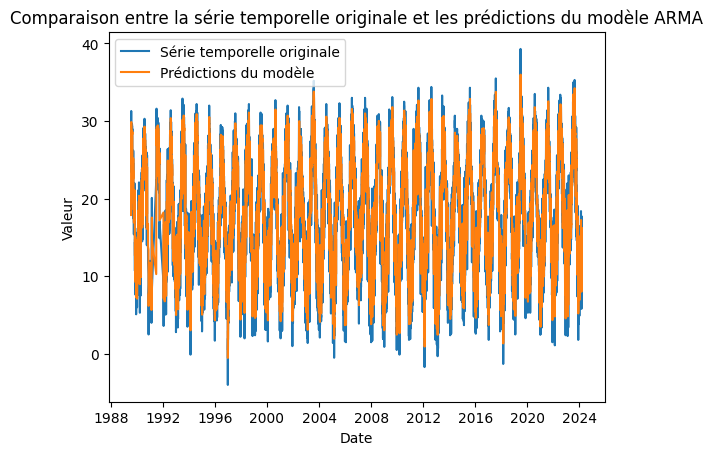

In [16]:
# Visualiser la série temporelle originale
plt.plot(df_test.index, df_test['TX'], label='Série temporelle originale')


start_date = '1950-01-01'
end_date = '2024-03-17'
# Obtenir les prédictions du modèle
predictions = model.predict()

# Visualiser les prédictions
plt.plot(df_test.index, predictions, label='Prédictions du modèle')

plt.xlabel('Date')
plt.ylabel('Valeur')
plt.title('Comparaison entre la série temporelle originale et les prédictions du modèle ARMA')
plt.legend()
plt.show()

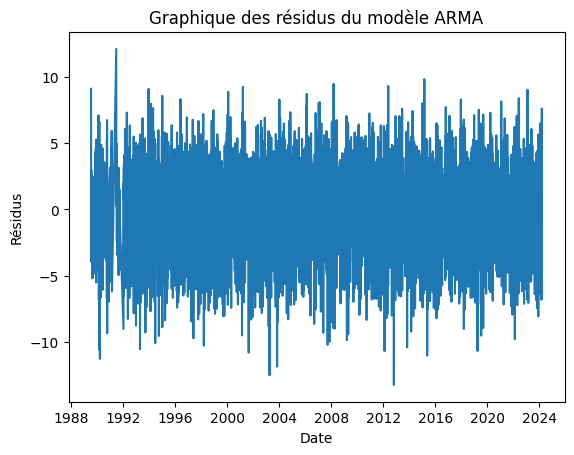

In [17]:
# Obtenir les résidus du modèle
residuals = model.resid

# Visualiser les résidus
plt.plot(df_test.index, residuals)
plt.xlabel('Date')
plt.ylabel('Résidus')
plt.title('Graphique des résidus du modèle ARMA')
plt.show()

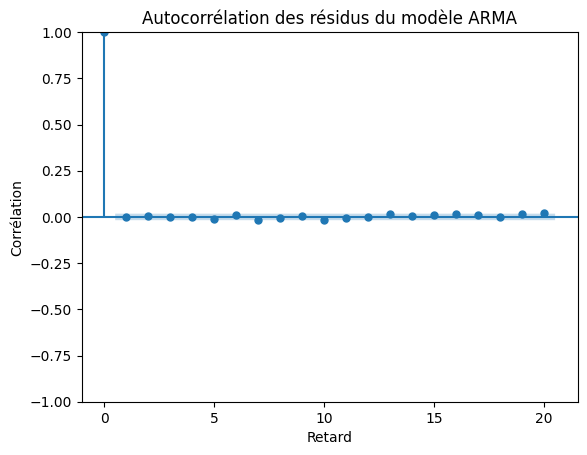

In [18]:
from statsmodels.graphics.tsaplots import plot_acf

# Afficher le graphique de l'autocorrélation des résidus
plot_acf(residuals, lags=20)
plt.xlabel('Retard')
plt.ylabel('Corrélation')
plt.title('Autocorrélation des résidus du modèle ARMA')
plt.show()

## Valeurs extrêmes

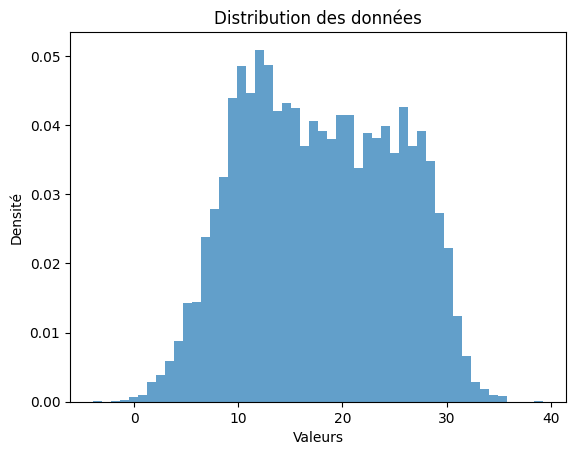

Seuil pour les valeurs extrêmes: 29.4


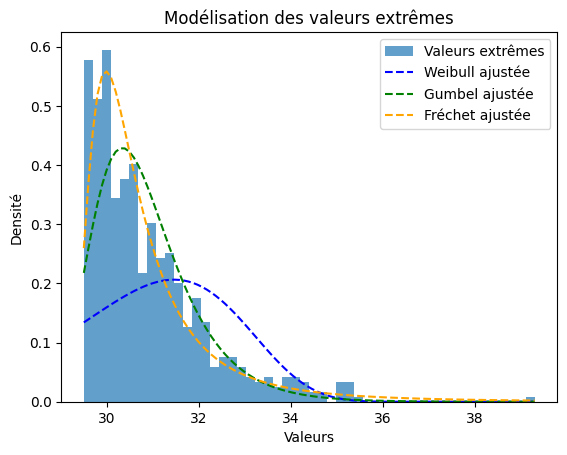

In [55]:
from scipy.stats import weibull_max, gumbel_r, genextreme, weibull_min

# Visualiser la distribution des données
plt.hist(df_test['TX'], bins=50, density=True, alpha=0.7)
plt.xlabel('Valeurs')
plt.ylabel('Densité')
plt.title('Distribution des données')
plt.show()

# Détermination du seuil pour les valeurs extrêmes
threshold = df_test['TX'].quantile(0.95)
print("Seuil pour les valeurs extrêmes:", threshold)

# Sélection des valeurs extrêmes
extreme_values = df_test[df_test['TX'] > threshold]['TX']

# Ajustement de la distribution de Weibull aux valeurs extrêmes
shape, loc, scale = weibull_min.fit(extreme_values, floc=0)
x_weibull = np.linspace(min(extreme_values), max(extreme_values), 100)
pdf_fitted_weibull = weibull_min.pdf(x_weibull, shape, loc, scale)

# Ajustement de la distribution de Gumbel aux valeurs extrêmes
params_gumbel = gumbel_r.fit(extreme_values)
x_gumbel = np.linspace(min(extreme_values), max(extreme_values), 100)
pdf_fitted_gumbel = gumbel_r.pdf(x_gumbel, *params_gumbel)

# Ajustement de la distribution de Fréchet aux valeurs extrêmes
params_frechet = genextreme.fit(extreme_values)
x_frechet = np.linspace(min(extreme_values), max(extreme_values), 100)
pdf_fitted_frechet = genextreme.pdf(x_frechet, *params_frechet)

# Visualisation des distributions ajustées
plt.hist(extreme_values, bins=50, density=True, alpha=0.7, label='Valeurs extrêmes')
plt.plot(x_weibull, pdf_fitted_weibull, color='blue', linestyle='--', label='Weibull ajustée')
plt.plot(x_gumbel, pdf_fitted_gumbel, color='green', linestyle='--', label='Gumbel ajustée')
plt.plot(x_frechet, pdf_fitted_frechet, color='orange', linestyle='--', label='Fréchet ajustée')
plt.xlabel('Valeurs')
plt.ylabel('Densité')
plt.title('Modélisation des valeurs extrêmes')
plt.legend()
plt.show()